In [1]:
# Import dependencies
import tensorflow as tf
from tensorflow import keras

import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

In [2]:
# Lets check your GPU
if tf.config.list_logical_devices('GPU') != []:
    print("LET'S DO THISS!!! :DDDD")
else: 
    print("Oh dude... D:")

LET'S DO THISS!!! :DDDD


In [3]:
(X_train_full, y_train_full), (X_test, y_test) = keras.datasets.mnist.load_data()
X_train_full.shape, X_test.shape

((60000, 28, 28), (10000, 28, 28))

In [16]:
def plot_image(image, title=None):
    if title:
        plt.title(title, size=16)
    plt.imshow(image, cmap='binary')
    plt.axis('off')
    
def plot_grid_images(images):
    n_images = len(images)
    fig = plt.figure(figsize=(n_images * 1.5, 2))
    for img_idx in range(n_images):
        plt.subplot(2, n_images, 1 + img_idx)
        plot_image(images[img_idx], img_idx)

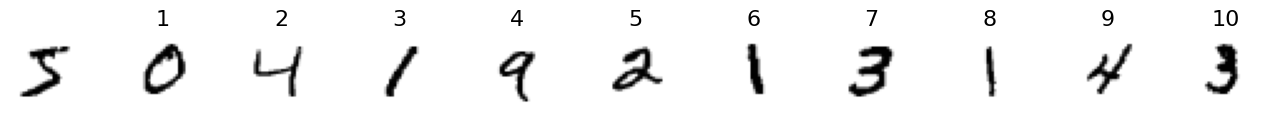

In [17]:
plot_grid_images(X_train_full[:11])

In [6]:
class Sampling(tf.keras.layers.Layer):
    def call(self, inputs):
        mean, log_var = inputs
        return tf.random.normal(tf.shape(log_var)) * tf.exp(log_var / 2) + mean 

custom_objects = {'Sampling': Sampling}

In [7]:
'''

Pre-trained models - Instructions about training you can find in another file

'''

model_name = 'regular_MNIST_vae'
if model_name == 'regular_MNIST_vae':
    variational_ae = keras.models.load_model('regular_MNIST_vae/autoencoder/vae_autoencoder.keras', custom_objects=custom_objects)
    variational_encoder = keras.models.load_model('regular_MNIST_vae/encoder/vae_encoder.keras', custom_objects=custom_objects)
    variational_decoder = keras.models.load_model('regular_MNIST_vae/decoder/vae_decoder.keras', custom_objects=custom_objects)
elif model_name == 'high_z_vae':
    variational_ae = keras.models.load_model('high_z_vae/variational_ae.h5', custom_objects=custom_objects)
    variational_encoder = keras.models.load_model('high_z_vae/variational_encoder.h5', custom_objects=custom_objects)
    variational_decoder = keras.models.load_model('high_z_vae/variational_decoder.h5', custom_objects=custom_objects)
elif model_name == 'Resnet_Like_MNIST_vae':
    variational_ae = keras.models.load_model('Resnet_Like_MNIST_vae/autoencoder/vae_autoencoder.tf', custom_objects=custom_objects)
    variational_encoder = keras.models.load_model('Resnet_Like_MNIST_vae/encoder/vae_encoder.tf', custom_objects=custom_objects)
    variational_decoder = keras.models.load_model('Resnet_Like_MNIST_vae/decoder/vae_decoder.tf', custom_objects=custom_objects)

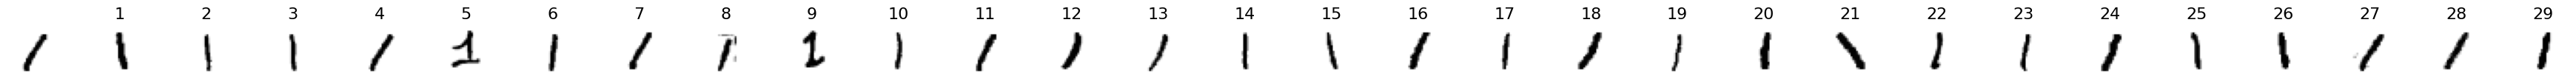

In [18]:
plot_grid_images(X_train_full[y_train_full == 1][:30])

In [19]:
list_slope_1 = [0, 4, 7, 18, 27, 28]

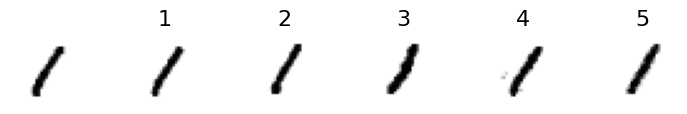

In [21]:
plot_grid_images(X_train_full[y_train_full == 1][list_slope_1])

In [37]:
_, _, X_slope_1_encoded = variational_encoder(X_train_full[y_train_full == 1][list_slope_1].reshape(-1, 28, 28, 1))

In [40]:
X_slope_1_encoded.numpy().shape

(6, 16)

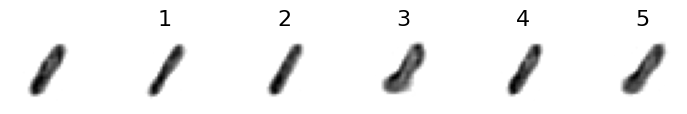

In [43]:
plot_grid_images(variational_decoder(X_slope_1_encoded).numpy())

In [45]:
centroid_slope_1 = X_slope_1_encoded.numpy().mean(axis=0).reshape(1, -1)
centroid_1 = variational_encoder(X_train_full[y_train_full == 1].reshape(-1, 28, 28, 1))[2].numpy().mean(axis=0).reshape(1, -1)
att_slope_1 = centroid_slope_1 - centroid_1

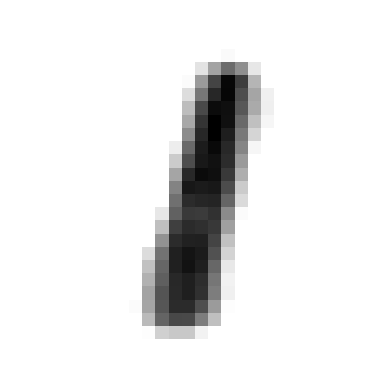

In [47]:
plot_image(variational_decoder(centroid_1).numpy().reshape(28, 28))

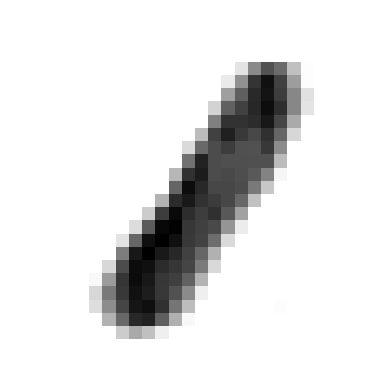

In [48]:
plot_image(variational_decoder(centroid_slope_1).numpy().reshape(28, 28))

In [147]:
samples = 20
A, B = centroid_slope_1, centroid_1
versor = (B - A) / np.linalg.norm(B - A)
d = np.linspace(0, np.linalg.norm(B - A), samples)
interpolated_points = A + d.reshape(-1, 1) * versor * 1.2

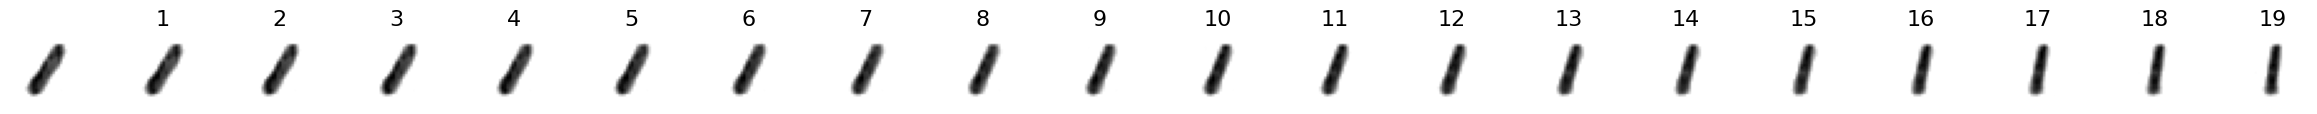

In [148]:
# Mudança da inclinação
plot_grid_images(variational_decoder(interpolated_points).numpy())

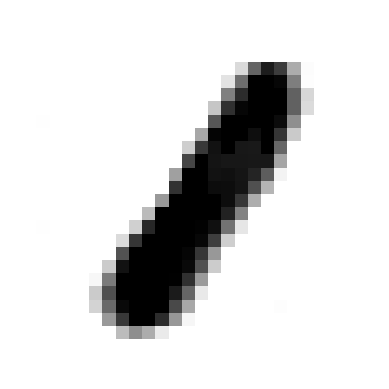

In [149]:
plot_image(np.clip((variational_decoder(interpolated_points[0].reshape(1, -1)).numpy() * 255).astype(int).reshape(28, 28), 0, 255))

In [150]:
import gradio as gr
import os


def image_classifier(value):
    return np.clip((variational_decoder(interpolated_points[value].reshape(1, -1)).numpy() * 255).astype(int).reshape(28, 28), 0, 255)

input_value_d = gr.Slider(minimum=0, maximum=19, default=0, step=1)
demo = gr.Interface(fn=image_classifier, inputs=input_value_d, outputs="image", live=True)

if __name__ == "__main__":
    demo.launch()

C:\Users\gabri\AppData\Local\Temp\ipykernel_25456\1721931206.py:8: GradioUnusedKwargWarning: You have unused kwarg parameters in Slider, please remove them: {'default': 0}
  input_value_d = gr.Slider(minimum=0, maximum=19, default=0, step=1)


Running on local URL:  http://127.0.0.1:7882

To create a public link, set `share=True` in `launch()`.
